In [1]:
import sys
import os
from taurex.opacity.hdf5opacity import HDF5Opacity
import h5py

taurex - INFO - Root logger initialized


In [9]:
#in_memory = HDF5Opacity('/Users/ahmed/Documents/taurex_files/xsec/hdf5_xsec/CH4_34to10.R10000_0.3-15mu.xsec.TauREx.h5'
#                               ,in_memory=True)

#stream_xsec = HDF5Opacity('/Users/ahmed/Documents/taurex_files/xsec/hdf5_xsec/CH4_34to10.R10000_0.3-15mu.xsec.TauREx.h5'
#                               ,in_memory=False)
stream_xsec = HDF5Opacity('/Users/ahmed/Desktop/mars/xsec/test_CH4.h5'
                               ,in_memory=False)

taurex.HDF5Opacity:test_CH4 - INFO - Loading opacity from /Users/ahmed/Desktop/mars/xsec/test_CH4.h5


In [10]:
wngrid = stream_xsec.wavenumberGrid

In [18]:
stream_xsec.xsecGrid[-1,0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       9.52767536e-23, 5.37351870e-23, 2.63862687e-23])

In [12]:
#%timeit in_memory.opacity(100.0,1e1)

In [13]:
%timeit stream_xsec.opacity(200.0,1e1)

1.69 ms ± 60.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


2.0057166124137304 2.4681146103126865


<IPython.core.display.Javascript object>


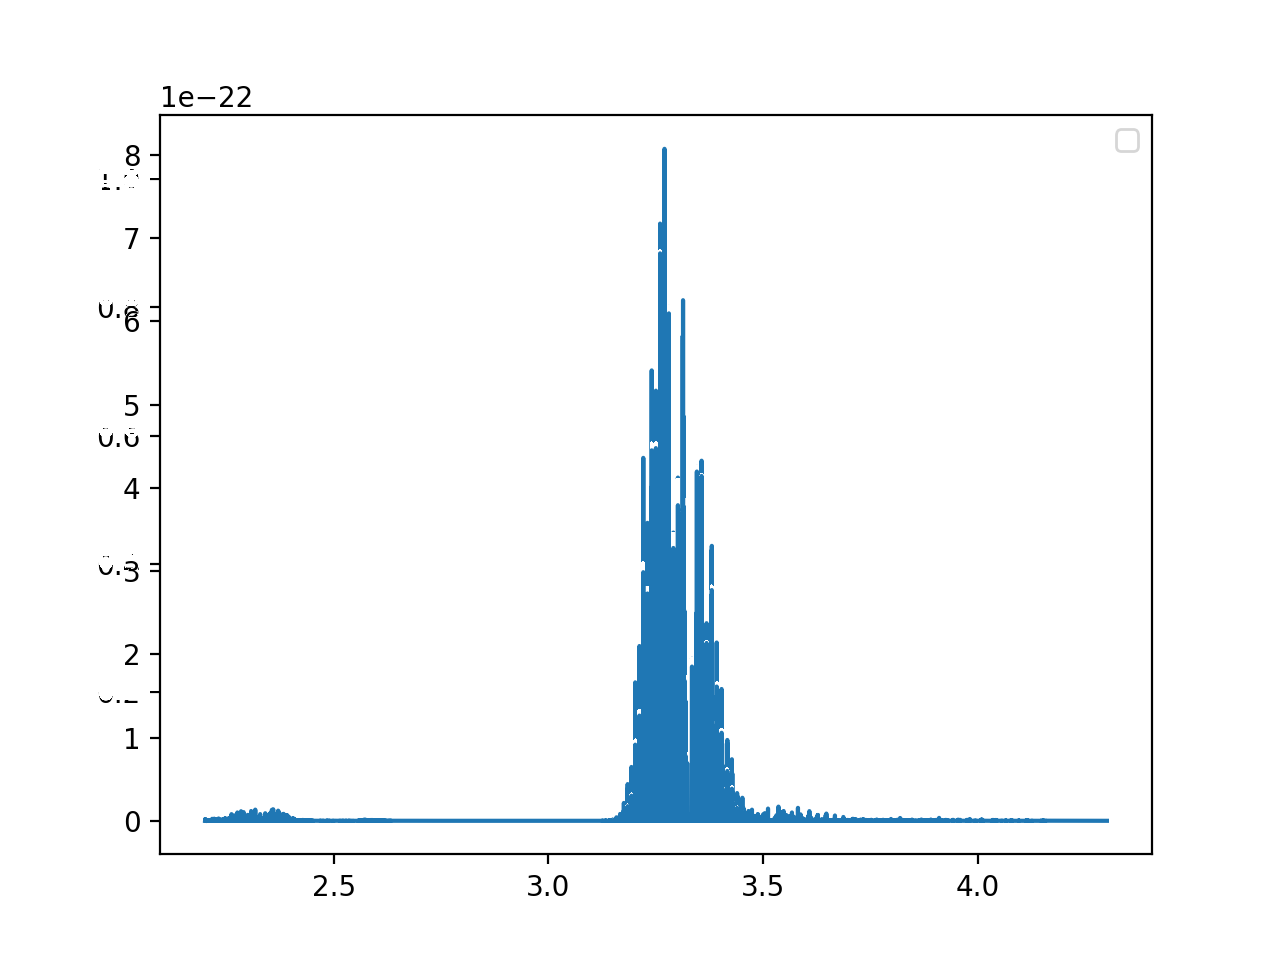

interactive(children=(FloatSlider(value=130.0, description='temp', max=329.0, min=130.0), FloatSlider(value=2.…

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from ipywidgets import *
min_temp = stream_xsec.temperatureGrid.min()
max_temp = stream_xsec.temperatureGrid.max()

min_press = np.log10(stream_xsec.pressureGrid.min())
max_press = np.log10(stream_xsec.pressureGrid.max())
return_c = True
print(min_press,max_press)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
real = plt.plot(10000/wngrid,stream_xsec.opacity(100.0,1e1,wngrid=wngrid))[0]
# real = plt.plot(np.log10(10000/wngrid),exp_o.opacity(100.0,1e1,wngrid),label='exp')[0]
#ax.set_xscale('log')

def update(temp=min_temp,pressure=min_press):
    absorp=stream_xsec.opacity(temp,10**pressure,wngrid=wngrid)
    
    real.set_ydata(absorp)
    # recompute the ax.dataLim
    
    ax.relim()
    ax.legend()
    # update ax.viewLim using the new dataLim
    ax.autoscale_view()
    fig.canvas.draw()

interact(update,temp=(min_temp,max_temp),pressure=(min_press,max_press,0.001));